In [ ]:
pip install kaggle

In [1]:
from google.colab import files

#upload the kaggle json api file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omidsleeper","key":"7acbf894a629f8c94fb5ad5f1474ed8e"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmode 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: chmode: command not found


In [3]:
!kaggle datasets download -d brsdincer/vehicle-detection-image-set

 88% 105M/119M [00:00<00:00, 138MB/s] 
100% 119M/119M [00:01<00:00, 124MB/s]


In [4]:
!unzip vehicle-detection-image-set.zip -d vehicle-detection-image

Streaming output truncated to the last 5000 lines.
  inflating: vehicle-detection-image/data/vehicles/4414.png  
  inflating: vehicle-detection-image/data/vehicles/4415.png  
  inflating: vehicle-detection-image/data/vehicles/4416.png  
  inflating: vehicle-detection-image/data/vehicles/4417.png  
  inflating: vehicle-detection-image/data/vehicles/4418.png  
  inflating: vehicle-detection-image/data/vehicles/4419.png  
  inflating: vehicle-detection-image/data/vehicles/442.png  
  inflating: vehicle-detection-image/data/vehicles/4420.png  
  inflating: vehicle-detection-image/data/vehicles/4421.png  
  inflating: vehicle-detection-image/data/vehicles/4422.png  
  inflating: vehicle-detection-image/data/vehicles/4423.png  
  inflating: vehicle-detection-image/data/vehicles/4424.png  
  inflating: vehicle-detection-image/data/vehicles/4425.png  
  inflating: vehicle-detection-image/data/vehicles/4426.png  
  inflating: vehicle-detection-image/data/vehicles/4427.png  
  inflating: vehicle

In [5]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
#define the vehicle and non-vehicle folder
vehicle_forlder='/content/vehicle-detection-image/data/vehicles'
non_vehicle_folder='/content/vehicle-detection-image/data/non-vehicles'
#initialize lists to store images and labels
images=[]
labels=[]
#load and preprocess vehicle images
for filename in os.listdir(vehicle_forlder):
  if filename.endswith('.png'):
    img=cv2.imread(os.path.join(vehicle_forlder,filename))
    img=cv2.resize(img,(128,128)) #resize the images
    images.append(img)
    labels.append(0) # 0 represents vehicle!
#load and preprocess non-vehicle images
for filename in os.listdir(non_vehicle_folder):
  if filename.endswith('.png'):
    img=cv2.imread(os.path.join(non_vehicle_folder,filename))
    img=cv2.resize(img,(128,128))
    images.append(img)
    labels.append(1) # 1 represents non-vehicle!
#conver lists to Numpy arrays!
images=np.array(images)
labels=np.array(labels)

In [6]:
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)
print("x_train data : ", len(x_train))
print("x_test data : ", len(x_test))
print("y_train : ", len(y_train))
print("y_test data : ", len(y_test))

x_train data :  14208
x_test data :  3552
y_train :  14208
y_test data :  3552


In [14]:
'''
from operator import mod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Conv2D(32,(3,3), padding='Same', activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), padding='Same', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(2,activation='softmax')])
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
from operator import mod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Conv2D(32,(3,3), padding='Same', activation=keras.layers.LeakyReLU(alpha=0.01),input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), padding='Same', activation=keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation=keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(32,activation=keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(2,activation='softmax')])
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# New code for image normalization
#x_train_normalized = x_train / 255.0
#x_test_normalized = x_test / 255.0
#history = model.fit(x_train_normalized , y_train , epochs=5 , batch_size=32 , validation_split=0.2)

In [39]:
#train the model
history = model.fit(x_train , y_train , epochs=5 , batch_size=32 , validation_split=0.2)

Epoch 1/5
356/356 [==============================] - 428s 1s/step - loss: 2.3740 - accuracy: 0.9118 - val_loss: 0.1221 - val_accuracy: 0.9592
Epoch 2/5
356/356 [==============================] - 429s 1s/step - loss: 0.0834 - accuracy: 0.9721 - val_loss: 0.0993 - val_accuracy: 0.9655
Epoch 3/5
356/356 [==============================] - 430s 1s/step - loss: 0.0683 - accuracy: 0.9785 - val_loss: 0.0811 - val_accuracy: 0.9673
Epoch 4/5
356/356 [==============================] - 418s 1s/step - loss: 0.0384 - accuracy: 0.9862 - val_loss: 0.0921 - val_accuracy: 0.9733
Epoch 5/5
356/356 [==============================] - 421s 1s/step - loss: 0.0383 - accuracy: 0.9870 - val_loss: 0.0571 - val_accuracy: 0.9828


In [40]:
#evaluat the model
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
#test_loss,test_acc=model.evaluate(x_test_normalized,y_test,verbose=2)

print(f'Test accuracy= {test_acc}')

111/111 - 29s - loss: 0.0484 - accuracy: 0.9834 - 29s/epoch - 261ms/step
Test accuracy= 0.9833896160125732


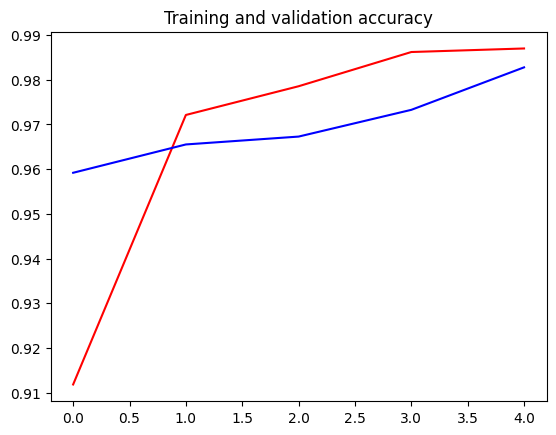

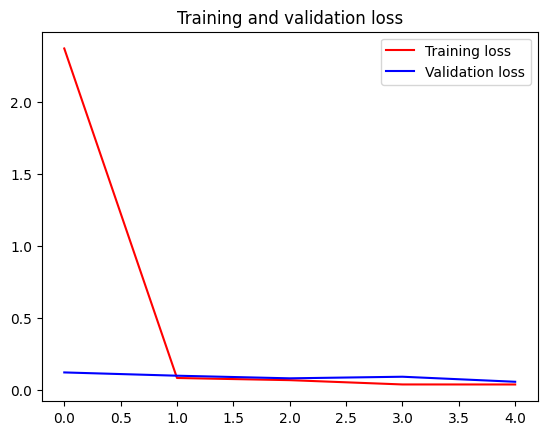

In [41]:
# Visulization of accuracy and loss
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label="Training accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

111/111 [==============================] - 49s 444ms/step
Confusion Matrix:
[[1724   27]
 [  32 1769]]
Classification Report:
              precision    recall  f1-score   support

     Vehicle       0.98      0.98      0.98      1751
 Non-Vehicle       0.98      0.98      0.98      1801

    accuracy                           0.98      3552
   macro avg       0.98      0.98      0.98      3552
weighted avg       0.98      0.98      0.98      3552

Accuracy: 0.9833896396396397
Precision: 0.9833941298241157
Recall: 0.9833896396396397
F1-Score: 0.9833899359080648


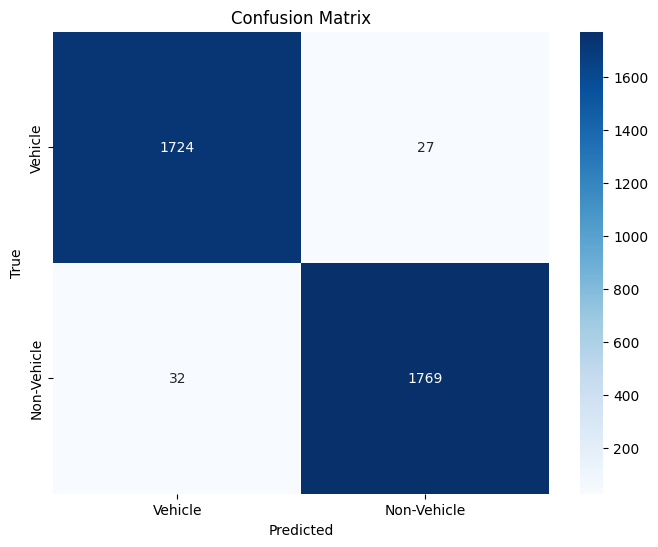

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
# Evaluate the model
#y_pred = np.argmax(model.predict(x_test_normalized), axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)


# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Create a classification report
class_report = classification_report(y_test, y_pred, target_names=['Vehicle', 'Non-Vehicle'])
print("Classification Report:")
print(class_report)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Vehicle', 'Non-Vehicle'], yticklabels=['Vehicle', 'Non-Vehicle'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
#Example: predicting on a single image
sample_image=x_test[677] #replace with your image data!
predictions=model.predict(np.expand_dims(sample_image,axis=0))
predicted_lable=np.argmax(predictions)

#you can interpret the lable with yousing your dataset's class lables (0 for vehicle ,1 for non-vehicle)
class_lables=['vehicle','non-vehicle']
predicted_class=class_lables[predicted_lable]
print(f'predicted_class: {predicted_class}')

1/1 [==============================] - 0s 61ms/step
predicted_class: vehicle


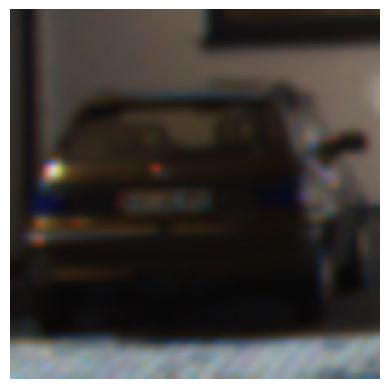

In [48]:
import matplotlib.pyplot as plt
#Display the sample image
plt.imshow(sample_image)
plt.axis('off')
plt.show()


In [69]:
#test from out of our dataset
uploaded=files.upload()

Saving d2.jpg to d2.jpg


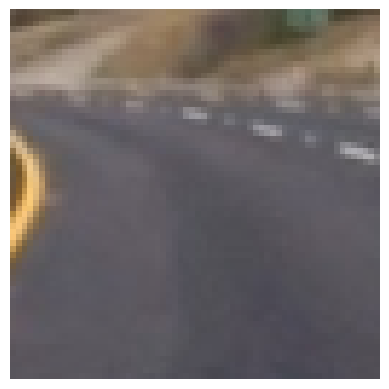

In [74]:
img_bgr=cv2.imread('/content/vehicle-detection-image/data/non-vehicles/extra1001.png',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)) #convert BGR color to RGB
#plt.imshow(img_bgr)
plt.axis('off')
plt.show()

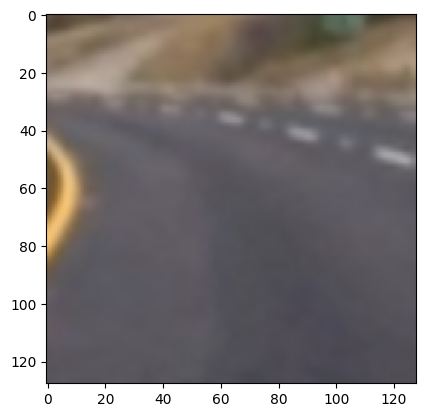

In [75]:
uploaded_image=cv2.resize(img_bgr,(128,128))
uploaded_image=cv2.cvtColor(uploaded_image,cv2.COLOR_BGR2RGB)
plt.imshow(uploaded_image)
plt.axis('on')
plt.show()

In [76]:
#uploaded_image=uploaded_image.astype('float32') / 255.0

uploaded_image=np.expand_dims(uploaded_image,axis=0)
#print(uploaded_image)
predictions=model.predict(uploaded_image)
predicted_lable=np.argmax(predictions)

1/1 [==============================] - 0s 74ms/step


In [77]:
from posix import read
class_lables=['vehicle','non-vehicle']
predicted_class=class_lables[predicted_lable]

print(f'predicted_class: {predicted_class}')

predicted_class: non-vehicle
